In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
signal = pd.Series(np.random.uniform(-1,1,10000))
noise = pd.Series(np.random.uniform(-1,1,10000))

In [3]:
df = pd.DataFrame({'signal': signal, 'noise': noise})

In [4]:
df['y_prob'] = pd.Series([abs((x+1)*x*(x-1)) for x in df['signal']])

In [5]:
df['y'] = pd.Series(np.random.binomial(1, df['y_prob']))

In [6]:
df.head(20)

,signal,noise,y_prob,y
0,-0.526357,-0.673981,0.380529,0
1,0.523041,0.898165,0.379952,0
2,-0.524205,0.666459,0.380158,1
3,0.207089,-0.393888,0.198208,0
4,0.526908,0.293059,0.380622,1
5,0.584865,0.922746,0.384802,0
6,-0.285785,0.768426,0.262444,0
7,0.184264,0.462870,0.178007,0
8,0.354622,0.751625,0.310026,1
9,-0.970276,0.268021,0.056824,0


In [7]:
X = df[['signal', 'noise']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [12]:
max_depth_list = list(range(1,30))

In [17]:
bv_dict = {'error': [],
           'max_depth': [],
           'type': []}

for md in max_depth_list:
    dt_clf = DecisionTreeClassifier(max_depth=md)
    dt_clf.fit(X_train, y_train)
    
    preds_train = dt_clf.predict_proba(X_train)[:,1]
    bv_dict['error'].append(1 - roc_auc_score(y_train, preds_train))
    bv_dict['type'].append('train')
    bv_dict['max_depth'].append(md)
    
    preds_test = dt_clf.predict_proba(X_test)[:,1]
    bv_dict['error'].append(1 - roc_auc_score(y_test, preds_test))
    bv_dict['type'].append('test')
    bv_dict['max_depth'].append(md)

In [18]:
bv_df = pd.DataFrame(bv_dict)

In [19]:
bv_df.head()

,error,max_depth,type
0,0.473211,1,train
1,0.473114,1,test
2,0.422170,2,train
3,0.413024,2,test
4,0.374200,3,train


<AxesSubplot: xlabel='max_depth', ylabel='error'>

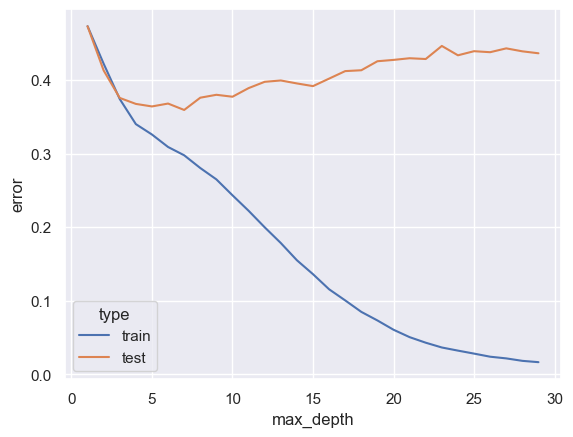

In [20]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data

# Plot the responses for different events and regions
sns.lineplot(x="max_depth", y="error", hue="type", data=bv_df)

In [16]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367
